In [64]:
import pandas as pd
# pd.set_option('display.max_colwidth', -1)
import contractions

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

import textstat

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
essay_train_data = pd.read_csv('data/kaggle_hawlett_data/training_set_rel3.csv')
essay_test_data = pd.read_csv('data/kaggle_hawlett_data/valid_set.csv')


In [3]:
essay_train_data.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [4]:
essay_train_data['essay_set'].value_counts()

5    1805
6    1800
2    1800
1    1783
4    1772
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

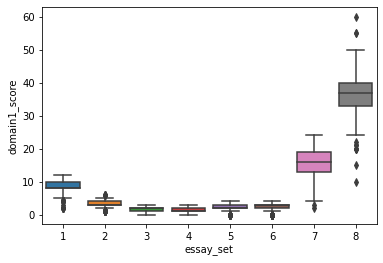

In [46]:
sns.boxplot(data=essay_train_data, x='essay_set', y='domain1_score')

In [48]:
def higher_score(row):
    if row['essay_set'] == 1 and row['domain1_score'] >= 10:
        return True
    if row['essay_set'] == 2 and row['domain1_score'] >= 4:
        return True
    if row['essay_set'] == 3 and row['domain1_score'] >= 2:
        return True
    if row['essay_set'] == 4 and row['domain1_score'] >= 2:
        return True
    if row['essay_set'] == 5 and row['domain1_score'] >= 3:
        return True
    if row['essay_set'] == 6 and row['domain1_score'] >= 3:
        return True
    if row['essay_set'] == 7 and row['domain1_score'] >= 19:
        return True
    if row['essay_set'] == 8 and row['domain1_score'] >= 40:
        return True
    return False 

essay_train_data['higher_score'] = essay_train_data.apply(higher_score, axis=1)

In [49]:
essay_train_data1 = essay_train_data[essay_train_data['essay_set']==1]
essay_train_data2 = essay_train_data[essay_train_data['essay_set']==2]
essay_train_data3 = essay_train_data[essay_train_data['essay_set']==3]
essay_train_data4 = essay_train_data[essay_train_data['essay_set']==4]
essay_train_data5 = essay_train_data[essay_train_data['essay_set']==5]
essay_train_data6 = essay_train_data[essay_train_data['essay_set']==6]
essay_train_data7 = essay_train_data[essay_train_data['essay_set']==7]
essay_train_data8 = essay_train_data[essay_train_data['essay_set']==8]

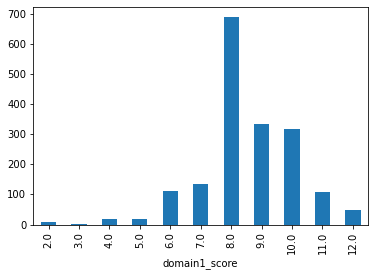

In [50]:
# essay_train_data1['domain1_score'].value_counts()

essay_train_data1.groupby(['domain1_score'])['essay_id'].count().plot.bar()


In [51]:
def essay_corpus(essay):
    corpus_string = ''
    for word in essay:
        corpus_string = corpus_string + str(word)
    return corpus_string

# essay_corpus(essay_train_data1[essay_train_data1['essay_id'] == 1]['essay'])

In [52]:
# essay_train_data1['no_contract'] = essay_train_data1['essay'].apply(lambda x: [contractions.fix(word) for word in x.split()])
# essay_train_data1['essay_str'] = [' '.join(map(str, l)) for l in essay_train_data1['no_contract']]
                                                                  
# essay_train_data1["essay_str"] = [' '.join([item for item in x.split() 
#                   if item[0] != '@']) 
#                   for x in essay_train_data1["essay_str"]]


contract = lambda x: ' '.join([contractions.fix(word) for word in x.split()])
essay_train_data["no_contract"] = essay_train_data["essay"].apply(contract)  

string = lambda x: ' '.join([item for item in x.split() if item[0] != '@'])
essay_train_data["essay_str"] = essay_train_data["no_contract"].apply(string)           

essay_train_data['tokenized'] = essay_train_data['essay_str'].apply(word_tokenize)

sentence = lambda x: textstat.sentence_count(x)
essay_train_data['sentence_cnt'] = essay_train_data['essay_str'].apply(sentence)

character = lambda x: textstat.char_count(x, ignore_spaces=True)
essay_train_data['char_cnt'] = essay_train_data['essay_str'].apply(character)

word = lambda x: len(x.split())
essay_train_data['word_cnt'] = essay_train_data['essay_str'].apply(word)

uword = lambda x: len(set(x.split()))
essay_train_data['unique_word_cnt'] = essay_train_data['essay_str'].apply(uword)

#lexical diversity = unique words / total words
essay_train_data['lex_diversity'] = essay_train_data['unique_word_cnt'] / essay_train_data['word_cnt']

fdist = lambda x: FreqDist(x)
essay_train_data['freq_dist'] = essay_train_data['tokenized'].apply(fdist)

fdist5 = lambda x: FreqDist([w for w in x if len(w) > 5])
essay_train_data['freq_dist5'] = essay_train_data['tokenized'].apply(fdist5)

uword5 = lambda x: len(x)
essay_train_data['unique_word_cnt5'] = essay_train_data['freq_dist5'].apply(uword5)


fdist7 = lambda x: FreqDist([w for w in x if len(w) > 7])
essay_train_data['freq_dist7'] = essay_train_data['tokenized'].apply(fdist7)

uword7 = lambda x: len(x)
essay_train_data['unique_word_cnt7'] = essay_train_data['freq_dist7'].apply(uword7)


fdist10 = lambda x: FreqDist([w for w in x if len(w) > 10])
essay_train_data['freq_dist10'] = essay_train_data['tokenized'].apply(fdist10)

uword10 = lambda x: len(x)
essay_train_data['unique_word_cnt10'] = essay_train_data['freq_dist10'].apply(uword10)



In [56]:
essay_train_data.head(5)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,unique_word_cnt,lex_diversity,freq_dist,freq_dist5,unique_word_cnt5,freq_dist7,unique_word_cnt7,freq_dist10,unique_word_cnt10,higher_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,175,0.516224,"{'Dear': 1, 'local': 2, 'newspaper': 1, ',': 1...","{'newspaper': 1, 'effects': 2, 'computers': 2,...",53,"{'newspaper': 1, 'computers': 2, 'learning': 2...",26,"{'skills/affects': 1, 'friends/new': 2, 'count...",6,False
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,208,0.503632,"{'Dear': 1, 'I': 7, 'believe': 2, 'that': 6, '...","{'believe': 2, 'computers': 7, 'benefit': 3, '...",66,"{'computers': 7, 'becoming': 1, 'websites': 2,...",28,"{'coordibates': 2, 'information': 4, 'conversa...",5,False
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,157,0.568841,"{'Dear': 1, ',': 8, 'More': 1, 'and': 12, 'mor...","{'people': 6, 'computers': 6, 'everyone': 1, '...",54,"{'computers': 6, 'everyone': 1, 'benefits': 1,...",19,"{'accomplishments': 1, 'interacting': 2}",2,False
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,251,0.516461,"{'Dear': 1, 'Local': 1, 'Newspaper': 3, ',': 1...","{'Newspaper': 3, 'experts': 1, 'computers': 8,...",103,"{'Newspaper': 3, 'computers': 8, 'studdies': 1...",50,"{'advertisments': 1, 'communication': 4, 'info...",6,True
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,220,0.473118,"{'Dear': 1, 'I': 1, 'know': 1, 'having': 1, 'c...","{'having': 1, 'computers': 9, 'positive': 1, '...",77,"{'computers': 9, 'positive': 1, 'families': 3,...",34,"{'information': 3, 'school/collage': 1, 'commu...",4,False


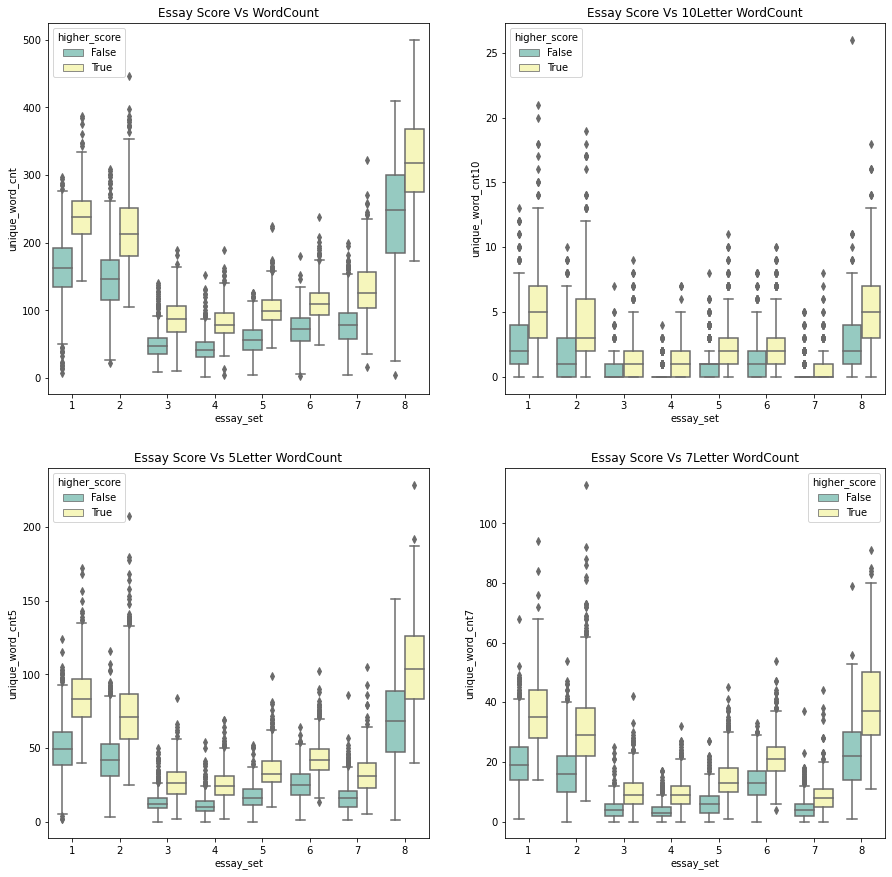

In [79]:
fig, ax =plt.subplots(2,2)
sns.boxplot(x="essay_set", y="unique_word_cnt",hue="higher_score",data=essay_train_data, palette="Set3",ax=ax[0][0]).set_title('Essay Score Vs WordCount')
sns.boxplot(x="essay_set", y="unique_word_cnt10",hue="higher_score",data=essay_train_data, palette="Set3",ax=ax[0][1]).set_title('Essay Score Vs 10Letter WordCount')
sns.boxplot(x="essay_set", y="unique_word_cnt5",hue="higher_score",data=essay_train_data, palette="Set3",ax=ax[1][0]).set_title('Essay Score Vs 5Letter WordCount')
sns.boxplot(x="essay_set", y="unique_word_cnt7",hue="higher_score",data=essay_train_data, palette="Set3",ax=ax[1][1]).set_title('Essay Score Vs 7Letter WordCount')

fig.set_figheight(15)
fig.set_figwidth(15)
fig.show()

# ax = sns.boxplot(x="essay_set", y="unique_word_cnt",hue="higher_score",data=essay_train_data, palette="Set3")